## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using linear machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).
- Load the data using Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply linear machine learning models to predict the quality column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
- Apply linear machine learning models to predict the alcohol column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.


# Wine quality project


In [ ]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy import stats
import statsmodels.api as sa
from statsmodels.stats.weightstats import ztest

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("winequality-red.csv")

#Description of dataset
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical and sensory ('quality') variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: acetic acid content which leading to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt 
8. Fixed acidity: are non-volatile acids that do not evaporate easily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops.  (Wines > 45g/ltrs are sweet)


Reference: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Descriptive Statistics
There is quite a bit of variation between means and standard deviations of some features, implying we should consider standardising variables in pre-modelling

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can look at the distributions.

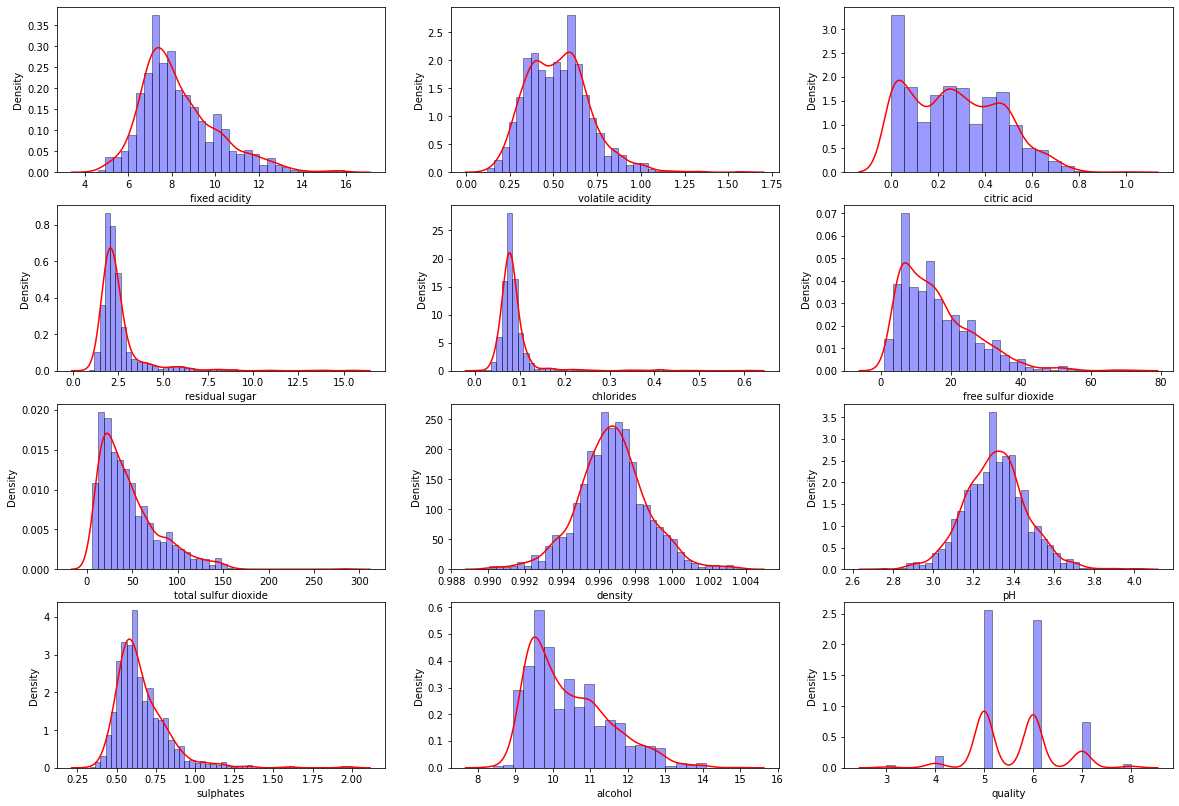

In [ ]:
fig = plt.figure(figsize=[20, 14])
cols = df.columns
cnt = 1
for col in cols:
  plt.subplot(4,3,cnt)
  sns.distplot(df[col], hist_kws=dict(edgecolor='k', linewidth=1, color='b'), color='r')
  cnt+=1
plt.tight_layout
plt.show()

For the most part, the features follow close to normal or right-skewed distribution. The sensory variable 'quality' is imbalanced - there are much more normal (rated 5-6) wines than good (rated 7-8) or poor (rated 3-4) ones.

## Outliers

In [ ]:
df_orig = df.copy()
df_alco = df.copy()

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

In [ ]:
# Removing outliers
df = df.drop(detect_outliers(df, df.columns[:-1]), axis = 0).reset_index(drop = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1475,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1476,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1477,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.quality.value_counts()

5    622
6    602
7    184
4     48
8     15
3      8
Name: quality, dtype: int64

All classes lost some rows after removing outliers, later on we will group them into 3 quality groups and try oversampling, because the 'quality' variable is imbalanced.

# Feature exploration

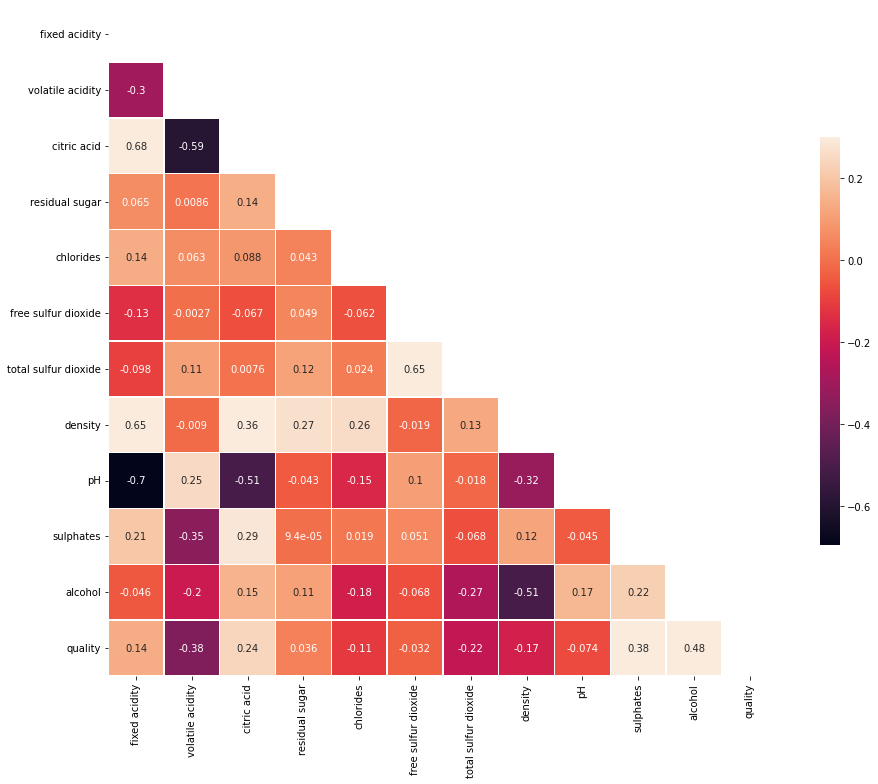

In [ ]:
corr_data = df
corr = corr_data.corr(method="pearson")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

* **Quality** is positively correlated with **alcohol**, **sulphates**, also slightly positively correlated with **citric acid**; and negatively correlated with **volatile acidity**.

* **Alcohol** is negatively correlated with **density**, slightly positively correlated with **sulphates**.

* Both **quality** and **alcohol** content is slightly negatively related to **volatile acidity**, **chlorides**, **total sulfur dioxide**.


* **pH** and **citric acid**/**fixed acidity** are strongly inversely related, it makes sense because acids have lower pH values.

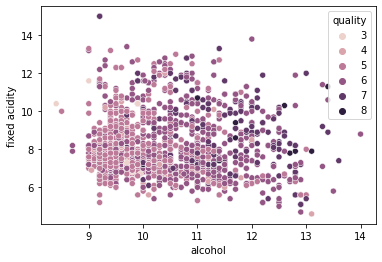

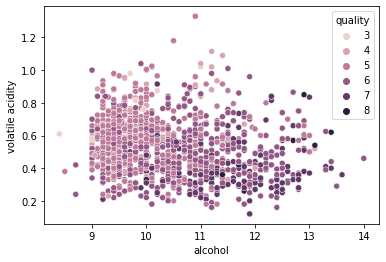

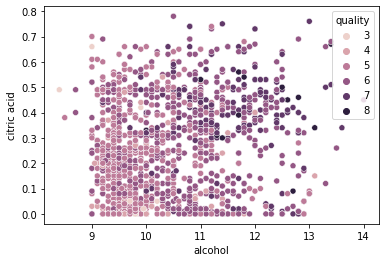

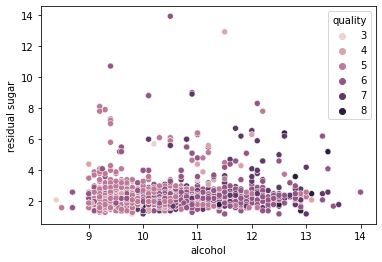

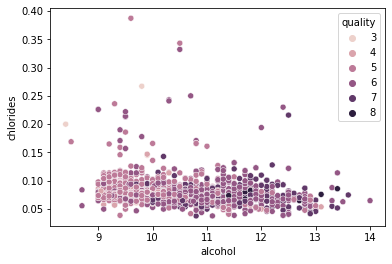

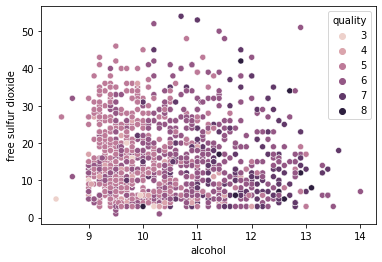

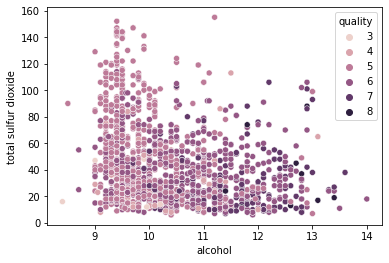

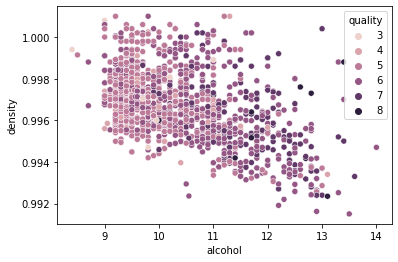

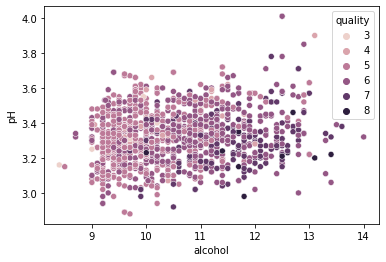

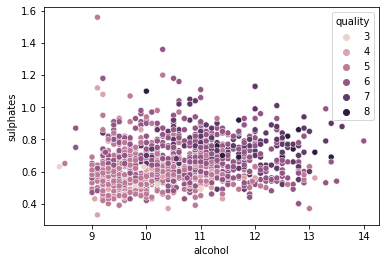

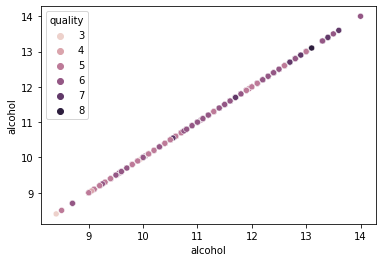

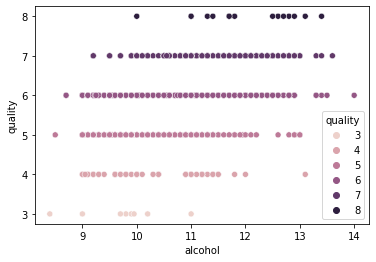

In [ ]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.scatterplot(x='alcohol', y =col, data=df, hue='quality')

Wines tend to be of higher quality when both sulphates and alcohol are high, if sulphates are high, but alcohol is low, it tends to be more mediocre.

Also, when chlorides are mediocre and alcohol is medium and high, the quality is likely to be better than when alcohol is low.

A combination of low volatile acidity and low total sulfur dioxide with medium-high alcohol content are more likely to characterize better quality wines



<Figure size 432x288 with 0 Axes>

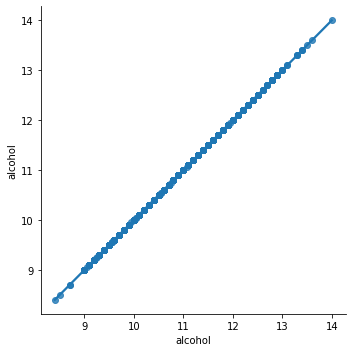

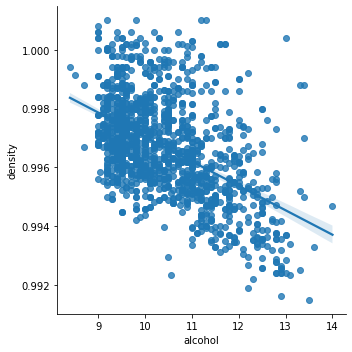

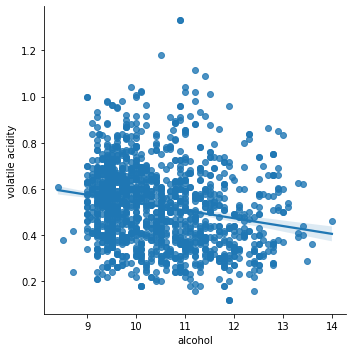

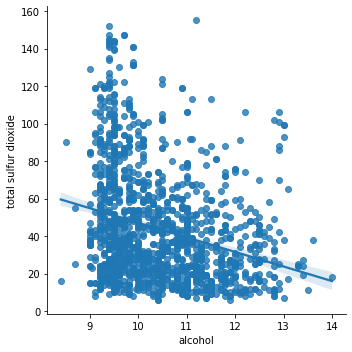

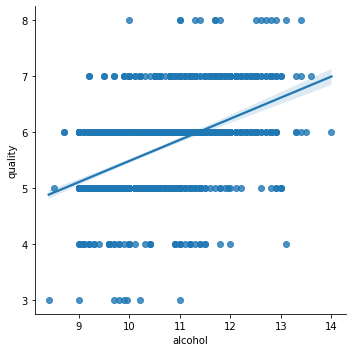

In [ ]:
dff = df[['alcohol', 'density','volatile acidity', 'total sulfur dioxide', 'quality']]
dff = dff.select_dtypes([np.int, np.float])

for i, col in enumerate(dff.columns):
    plt.figure(i)
    sns.lmplot(x='alcohol', y =col, data=dff)

## Mutual information

In [ ]:
X1 = df.copy()
y1 = X1.pop("quality")

In [ ]:
# Label encoding for categoricals
for colname in X1.select_dtypes("object"):
    X1[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X1.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X1, y1, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X1.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X1, y1, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

alcohol      0.149389
sulphates    0.085306
chlorides    0.048916
pH           0.011287
Name: MI Scores, dtype: float64

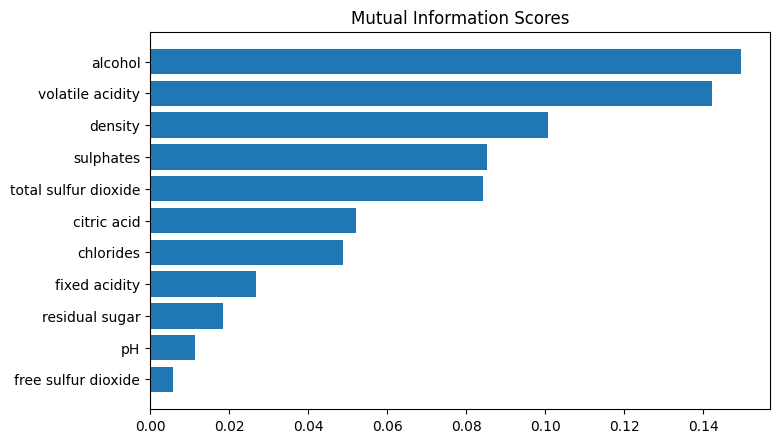

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Mutual information measures how much one random variables tells us about another. It is a dimensionless quantity with (generally) units of bits, and can be thought of as the reduction in uncertainty about one random variable given knowledge of another. In this case, we see which variables are related to 'quality' variable. The top variable that shares the most information with quality is alcohol.

# Hypothesis testing

H0: Alcohol content is not significantly different between poor and good quality wines. 

H1: Alcohol content is higher in good quality wines, compared to poor quality wines.


We will use the original, imbalanced data for comparing the means.

In [ ]:
bins2 = (3, 5.5, 8)
group_names2 = ['poor', 'good']
df_qual = df_orig
df_qual['qual'] = pd.cut(df_qual['quality'], bins = bins2, labels = group_names2)

In [ ]:
low_qual = df_qual.loc[df_qual['qual'] == 'poor']
low_qual_ABV = low_qual['alcohol'].values
low_qual_ABV.mean()

9.92608991825613

In [ ]:
low_qual

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,poor
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,poor
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,poor
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,poor
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5,poor
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5,poor
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5,poor
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,poor


In [ ]:
low_qual[['alcohol', 'quality']].describe()

,alcohol,quality
count,734.00000,734.000000
mean,9.92609,4.927793
std,0.75775,0.259007
min,8.50000,4.000000
25%,9.40000,5.000000
50%,9.70000,5.000000
75%,10.30000,5.000000
max,14.90000,5.000000


In [ ]:
good_qual = df_qual.loc[df_qual['qual'] == 'good']
good_qual_ABV = good_qual['alcohol'].values
good_qual_ABV.mean()

10.85502923976608

In [ ]:
good_qual[['alcohol', 'quality']].describe()

,alcohol,quality
count,855.000000,855.000000
mean,10.855029,6.274854
std,1.106109,0.491627
min,8.400000,6.000000
25%,10.000000,6.000000
50%,10.800000,6.000000
75%,11.700000,7.000000
max,14.000000,8.000000


In [ ]:
# Z-test
print('Low quality vs. Good quality wines: Alcohol', ztest(low_qual_ABV, good_qual_ABV, value=0, alternative='smaller'),  end='\n') #The difference in means (X1-X2) is smaller than 0 when X2 is larger

Low quality vs. Good quality wines: Alcohol (-19.209597655060662, 1.5382050442588566e-82)


Z-test confirms that good quality wines have a significantly higher mean alcohol content. Z-test is negative because the second groups' (good quality wines) mean alcohol content is higher.

#Creating classification bins for modeling
Using data with removed outliers

In [ ]:
bins = (2, 4, 6, 8)
group_names = ['0', '1', '2']
df_q = df['quality'].copy()
df_q = pd.cut(df_q, bins = bins, labels = group_names)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assigning a label to our quality variable
label_quality = LabelEncoder()

# Now changing our dataframe to reflect our new label
y = label_quality.fit_transform(df_q)

In [ ]:
X = df.drop('quality', axis=1)

## Standartization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
X = MinMaxScaler().fit_transform(RobustScaler().fit_transform(X))
X.shape

(1479, 11)

# Predicting quality

In [ ]:
# Splitting dataset before using oversampling to balance data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Over-sampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print(counter)

Counter({1: 1224, 2: 199, 0: 56})


In [ ]:
# Resampling training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_resampled).items()))


[(0, 917), (1, 917), (2, 917)]


## Model for predicting quality

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver ='newton-cg')
logreg.fit(X_train_resampled, y_train_resampled)

# Predicting the test set
y_pred = logreg.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.086     0.583     0.151        12
           1      0.932     0.577     0.712       307
           2      0.394     0.765     0.520        51

    accuracy                          0.603       370
   macro avg      0.471     0.642     0.461       370
weighted avg      0.830     0.603     0.668       370



**Precision** is the ratio between the True Positives and all the Positives. 
**Recall** is the measure of our model correctly identifying True Positives.
The **F1 score** is defined as the harmonic mean of precision and recall.

Logistic regression model performs fairly poorly, out of the 3 classes, the best classifed is the largest one - normal quality wines. The poor and good quality wines are smaller in number and they are also classified quite poorly.



In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_resampled, y_train_resampled)

#Predicting the test Set
y_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.130     0.583     0.212        12
           1      0.920     0.678     0.780       307
           2      0.400     0.706     0.511        51

    accuracy                          0.678       370
   macro avg      0.483     0.656     0.501       370
weighted avg      0.823     0.678     0.725       370



In [ ]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_resampled,
                             y = y_train_resampled, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.8400540184453227

In [ ]:
# Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(X_train_resampled, y_train_resampled)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
# Here is the best accuracy
best_accuracy

0.9480158102766799

In [ ]:
best_parameters

{'C': 1000, 'gamma': 0.9, 'kernel': 'rbf'}

In [ ]:
classifier = SVC(C=1000, kernel = 'rbf', random_state = 0, gamma = 0.9)
classifier.fit(X_train_resampled, y_train_resampled)

# Predicting the Test Set
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.174     0.333     0.229        12
           1      0.912     0.847     0.878       307
           2      0.516     0.627     0.566        51

    accuracy                          0.800       370
   macro avg      0.534     0.603     0.558       370
weighted avg      0.834     0.800     0.814       370



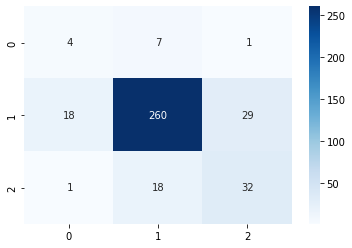

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='2.0f', cmap='Blues')

This SVM model is our best classification model. The normal quality is still the best predicted, and the weak point is still classification of the poor quality wines. As we can see in the top row, poor quality wines are often predicted as normal quality.

On the bright side, since we are probably more interested in choosing a better quality wine, we managed to improve our models performance - it mostly predicts good quality wines correctly, sometimes we get normal quality, but almost no poor quality wines.

# Predicting alcohol content


## Alcohol content in red Vinho verde
This specific type of portuguese red wine Vinho Verde is characterized by low alcohol content compared to other wines. Most Vinho Verde wines contain less than 11.5% alcohol. Curiously, the red wines tend to be lower in alcohol than the whites, with single-digit ABVs not uncommon.


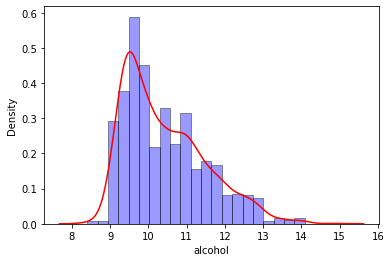

In [ ]:
sns.distplot(df_alco.alcohol, hist_kws=dict(edgecolor='k', linewidth=1, color='b'), color='r')

In [ ]:
df_alco.alcohol.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

Lowest ABV (alcohol by volume) is 8.4, median is 10.2 and highest ABV value is 14.0

In [ ]:
Y_alc = df_alco['alcohol']
X_alc = df_alco.drop('alcohol', axis=1)

In [ ]:
X_alc = MinMaxScaler().fit_transform(RobustScaler().fit_transform(X_alc))
X_alc.shape

(1599, 11)

In [ ]:
X_alc_train, X_alc_test, y_alc_train, y_alc_test= train_test_split(X_alc, Y_alc, test_size=0.25, random_state=0)

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_alc_train, y_alc_train)
reg_predict = reg.predict(X_alc_test)

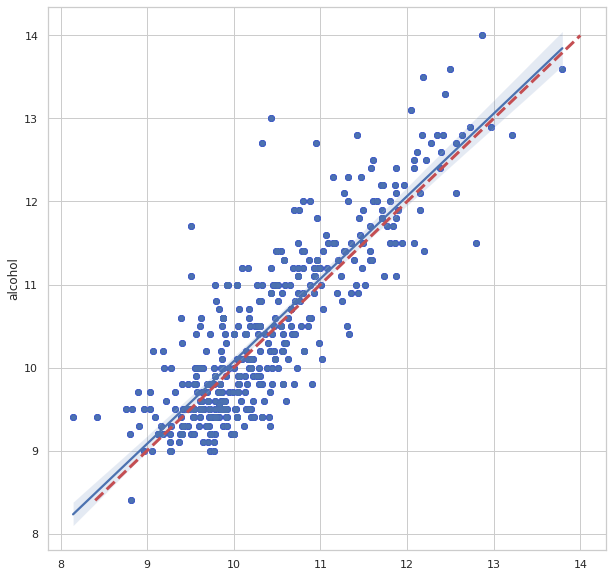

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
ax.scatter(reg_predict, y_alc_test, edgecolors=(0, 0, 1))
ax.plot([y_alc_test.min(), y_alc_test.max()], [y_alc_test.min(), y_alc_test.max()], 'r--', lw=3)
sns.regplot(x=reg_predict, y=y_alc_test, data=Y_alc);

### Evaluation metrics

- **Mean absolute error** - represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
- **Mean squared error** - represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
- **Root Mean Squared Error** is the square root of Mean Squared error. It measures the standard deviation of residuals.
- **R-squared score** (the coefficient of determination) - represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [ ]:
# Model evaluation for testing set

mae = metrics.mean_absolute_error(y_alc_test, reg_predict)
mse = mean_squared_error(y_alc_test, reg_predict)
rmse = mean_squared_error(y_alc_test, reg_predict, squared=False)
r2 = r2_score(y_alc_test, reg_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.43643757884954154
MSE is 0.3231881710076013
RMSE is 0.568496412484372
R2 score is 0.7145955871816363


R-squared is 0.71, which shows that this linear regression model explains around 71% of variance of Y(alcohol) for the test data.

MSE, RMSE, or MAE are better be used to compare performance between different regression models.

There is no correct value for **MSE**. Simply put, the lower the value the better and 0 means the model is perfect.

Similarly, there is also no correct answer as to what **R2** should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

# Discussion - what are the important characteristics of red Vinho verde wines?

Generally, Vinho Verde wines, compared to other types, are distinguished by their high acidity, low alcohol, and slight spritz.

* In this dataset, wines of relatively **higher alcohol content** tend to rated higher by sensory quality characteristics.

* **Volatile acidity** has a negative
impact on quality, since acetic acid is the key ingredient in vinegar and might give an unpleasant taste. 

* Also important are **sulphates**. An increase in sulphates might be related to the fermenting nutrition, which is very important to improve the wine aroma (Cortez et al., 2009). Thus, sensory quality tends to be rated higher in high sulphate Vinho Verde wines.